In [1]:
%config InlineBackend.figure_format ='retina'
%matplotlib inline

import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set options
sns.set_style('darkgrid')
pd.set_option("display.max_rows", 10)


In [2]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

for user in users:
    user["friends"] = []
    
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [3]:
g = nx.Graph()

g.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
g.add_edges_from(friendships)

In [4]:
g.number_of_nodes()

10

In [5]:
g.number_of_edges()

12

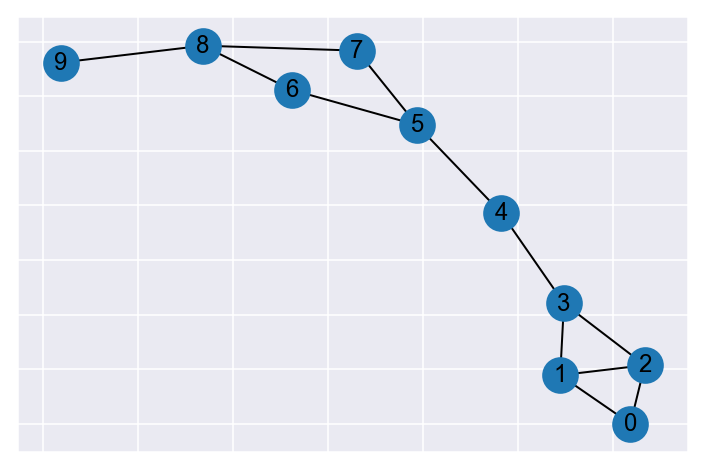

In [6]:
nx.draw_networkx(g)
plt.axis('off')

A node's degree is the number of connections it has.

In [7]:
nx.degree(g, 3)

3

In [8]:
nx.degree(g, 4)

2

The _local clustering coefficient_ is the fraction of a node's connections that are also connected.

In [9]:
nx.clustering(g, 0)

1.0

In [10]:
nx.clustering(g, 4)

0

In [11]:
nx.clustering(g, 1)

0.6666666666666666

Betweenness centrality estimates which nodes are important in connecting networks

In [12]:
df = pd.DataFrame()

df["node"] = g.nodes()
df["centrality"] = pd.Series(nx.degree_centrality(g))
df["eigenvector"] = pd.Series(nx.eigenvector_centrality(g))
df["betweenness"] = pd.Series(nx.betweenness_centrality(g, normalized = True, endpoints = True))

df

,node,centrality,eigenvector,betweenness
0,0,0.222222,0.385777,0.200000
1,1,0.333333,0.514787,0.277778
2,2,0.333333,0.514787,0.277778
3,3,0.333333,0.473312,0.600000
4,4,0.222222,0.233613,0.644444
5,5,0.333333,0.150158,0.655556
6,6,0.222222,0.083563,0.333333
7,7,0.222222,0.083563,0.333333
8,8,0.333333,0.072853,0.388889
9,9,0.111111,0.027299,0.200000


In [13]:
nx.betweenness_centrality(g, normalized = True, endpoints = True)

{0: 0.2,
 1: 0.2777777777777778,
 2: 0.2777777777777778,
 3: 0.6,
 4: 0.6444444444444445,
 5: 0.6555555555555556,
 6: 0.33333333333333337,
 7: 0.33333333333333337,
 8: 0.3888888888888889,
 9: 0.2}

In [14]:
nx.betweenness_centrality(g, normalized = True, endpoints = False)

{0: 0.0,
 1: 0.09722222222222221,
 2: 0.09722222222222221,
 3: 0.5,
 4: 0.5555555555555556,
 5: 0.5694444444444444,
 6: 0.16666666666666666,
 7: 0.16666666666666666,
 8: 0.2361111111111111,
 9: 0.0}